# Automatic Analysis of XAS *In-Situ* Data w. Measured Standards
Notebook showing an example workflow used for automatic analysis of XAS *in-situ* data when standards for both unreduced precursors and reduced metal foils have been measured on the same instrument.

# Imports
Here the required packages and functions are imported.

Whether plots are interactive is also changed here. 

In [1]:
# Functions written for the analysis of XAS data
from autoXAS.data import *
from autoXAS.analysis import *
from autoXAS.plotting import *

%matplotlib inline

# Boolean flags
Here the values of boolean flags (True/False) that occur throughout the notebook can be changed.

In [2]:
# Decide if transmission or absorption data should be used for normalization and analysis
use_transmission = False
# Decide if subtraction of pred-edge should be used for normalization
use_preedge = True
# Decide if plots should be interactive or static
interactive = False

# Splitting of .dat files
Split .dat files containing multiple measurements into single measurement files

In [3]:
# split_dat_file(
#     data_folder='../Data/ESRF_BM31/IrPtPdRuRh_XAS/IrPtPdRuRh_XAS/XAS1/',
#     filename='Pd',
#     header_length=81,
#     data_length=161, # This value will most likely be different for each measured edge
#     footer_length=5,
# )

# Experiments
Here the measured data from different experiments are loaded, preprocessed and analysed. 

This section needs to be run every time a new experiment is analysed.

## Preprocessing

### Load data

#### Single dataset
Use either this section or *Stiching together datasets*.

In [4]:
# Data folder location
folder_XAS_data = '../Data/ESRF_SNBL/Averaging'

# Load data and perform initial processing
df_data = load_and_prepare_data(
    folder_XAS_data,
    energy_column='ZapEnergy',
    I0_columns=['mon_3', 'mon_4'],
    I1_columns='xmap_roi00',
    metal=('_',-2),
    energy_column_unitConversion=1000,
    xas_mode='Flourescence',
    extract_time=False,
    # time_skipLines=28,
    # time_startTag='#D ',
    # time_endTag='#C ',
    file_selection_condition='xanes',
    negated_condition=False,
    keep_incomplete=True,
)

Loading data: 100%|██████████| 4/4 [00:00<00:00,  4.81it/s, Currently loading PtFeCoNi_60pct_insitu_Pt_xanes.dat]


Incomplete measurement detected!
Not all edges were measured 48 times, but only 32 times.
Incomplete measurements will be removed unless keep_incomplete="True".


#### Stiching together datasets
Use either this section or *Single dataset*.

In [5]:
# # Specify all data locations
# list_of_folders = [
#     '../Data/ESRF_BM31/IrPtPdRuRh_XAS/IrPtPdRuRh_XAS/XAS1/',
#     '../Data/ESRF_BM31/IrPtPdRuRh_XAS/IrPtPdRuRh_XAS/XAS2/',
#     '../Data/ESRF_BM31/IrPtPdRuRh_XAS/IrPtPdRuRh_XAS/XAS3/',
#     '../Data/ESRF_BM31/IrPtPdRuRh_XAS/IrPtPdRuRh_XAS/XAS4/',
# ]

# # Create empty list to hold all datasets
# list_of_datasets = []

# # Load data
# for folder in list_of_folders:
#     df_data = load_xas_data(
#         folder, 
#         synchrotron='ESRF', 
#         file_selection_condition='mono', 
#         negated_condition=True, 
#         verbose=False,
#     )

#     # Initial data processing
#     df_data = processing_df(df_data, synchrotron='ESRF')

#     # Append to list of datasets
#     list_of_datasets.append(df_data)

# # Combine the datasets
# df_data = combine_datasets(list_of_datasets)

#### Plot raw data

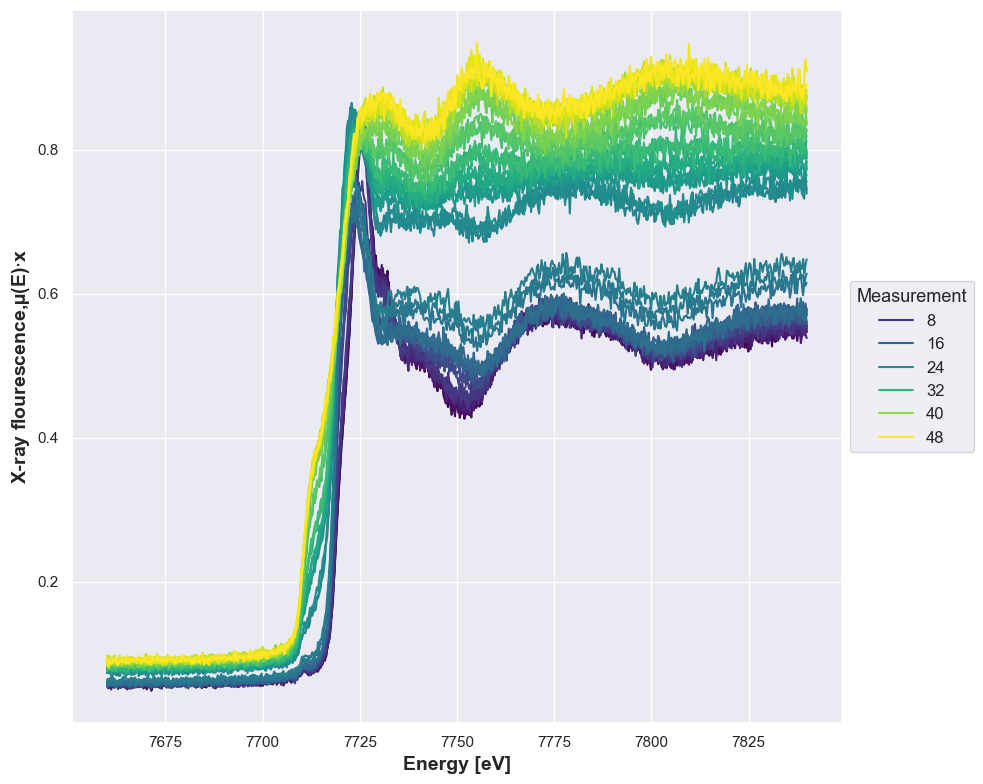

In [6]:
plot_non_normalized_xas(
    df_data,
    experiment='PtFeCoNi_60pct_insitu_Co_xanes',
    transmission=use_transmission,
    interactive=interactive,
)

### Average measurements

#### Average specific range of measurements

In [7]:
# df_data = average_measurements(
#     df_data,
#     measurements_to_average=10,
# )

#### Average repeat measurements periodically

In [8]:
df_data = average_measurements_periodic(
    df_data,
    period=None,
    n_periods=16,
)

#### Plot averaged data

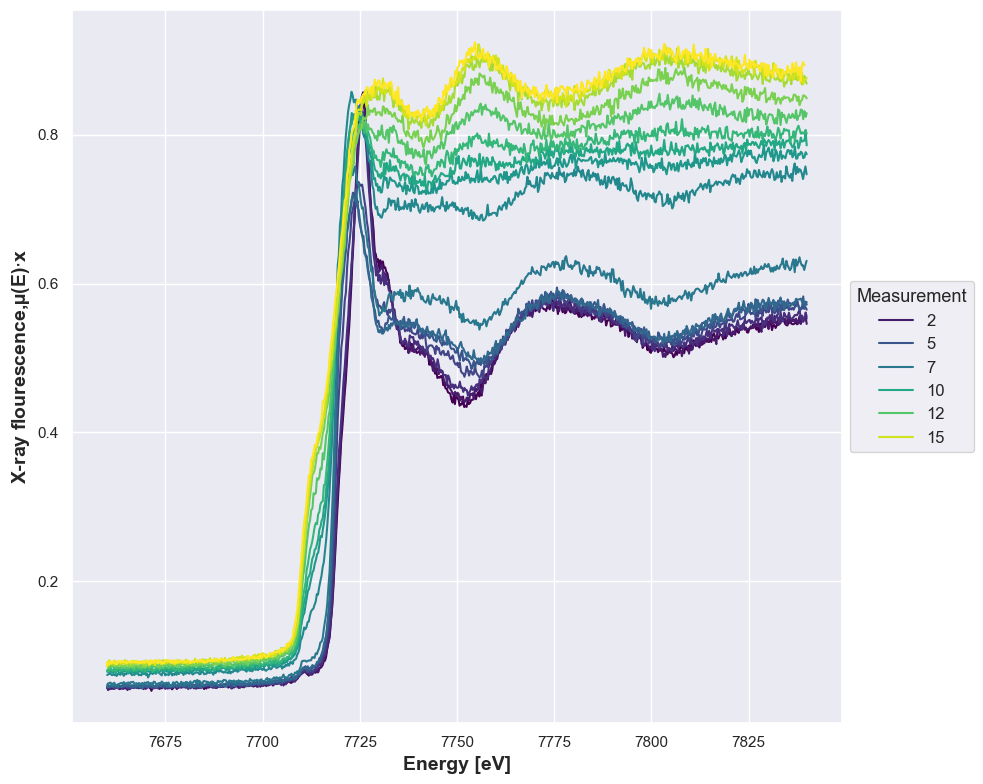

In [9]:
plot_non_normalized_xas(
    df_data,
    experiment='PtFeCoNi_60pct_insitu_Co_xanes',
    transmission=use_transmission,
    interactive=interactive,
)

### Edge shifts
Calculate or specify the energy shift of the measured edges

In [10]:
# # Calculate the edge energy shift at each edge
# edge_correction_energies = {
#     'Pd':calc_edge_correction(df_foils, metal='Pd', edge='K', transmission=use_transmission),
#     'Ag':calc_edge_correction(df_foils, metal='Ag', edge='K', transmission=use_transmission),
#     'Rh':calc_edge_correction(df_foils, metal='Rh', edge='K', transmission=use_transmission),
#     'Ru':calc_edge_correction(df_foils, metal='Ru', edge='K', transmission=use_transmission),
#     'Mn':calc_edge_correction(df_foils, metal='Mn', edge='K', transmission=use_transmission),
#     'Ir':calc_edge_correction(df_foils, metal='Ir', edge='L3', transmission=use_transmission),
#     'Pt':calc_edge_correction(df_foils, metal='Pt', edge='L3', transmission=use_transmission),
# }

# Use dictionary filled with 0's if no foils have been measured
edge_correction_energies = {
    'Pd':0,
    'Ag':0,
    'Rh':0,
    'Ru':0,
    'Mn':0,
    'Ir':0,
    'Pt':0,
    'Co':0,
    'Fe':0,
    'Ni':0,
    'Au':0,
}

### Normalization

In [11]:
# Normalization of the data
normalize_data(
    df_data, 
    edge_correction_energies, 
    subtract_preedge=use_preedge, 
    transmission=use_transmission
)
df_data.head()

Normalization progress: 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]


,mon_1,Det_1,Det_2,Det_3,Det_4,Det_5,Det_6,mon_2,mon_3,mon_4,...,Flourescence,Transmission,Measurement,Start Time,End Time,Relative Time,Energy_Corrected,Normalized,pre_edge,post_edge
0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11305.0,...,0.056087,0.0,1,0,1,1,7660.017090,0.000114,0.003642,0.545088
1,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11309.0,...,0.056824,0.0,1,0,1,1,7660.227051,0.001440,0.003661,0.545004
2,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11317.0,...,0.057078,0.0,1,0,1,1,7660.472656,0.001869,0.003684,0.544905
3,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11310.0,...,0.055800,0.0,1,0,1,1,7660.726562,-0.000535,0.003707,0.544803
4,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11312.0,...,0.058467,0.0,1,0,1,1,7660.989746,0.004351,0.003731,0.544698


#### Plot pre- and post-edge fits

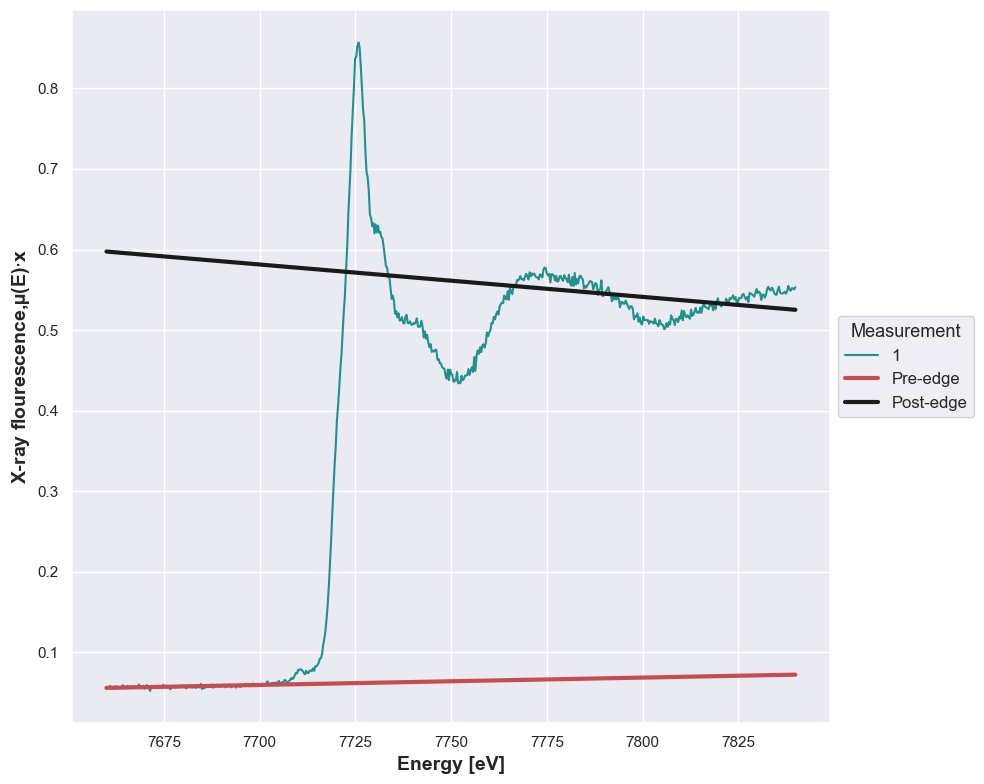

In [12]:
plot_non_normalized_xas(
    df_data[df_data['Measurement'] == 1],
    experiment='PtFeCoNi_60pct_insitu_Co_xanes',
    pre_edge=True,
    post_edge=True,
    transmission=use_transmission,
    interactive=interactive,
)

#### Saving results as .csv file

In [13]:
# save_data(df_data, filename='Normalized_XAS_data.csv')

## Data inspection
It is always a good idea to visually inspect the data to see if it behaves as it should.

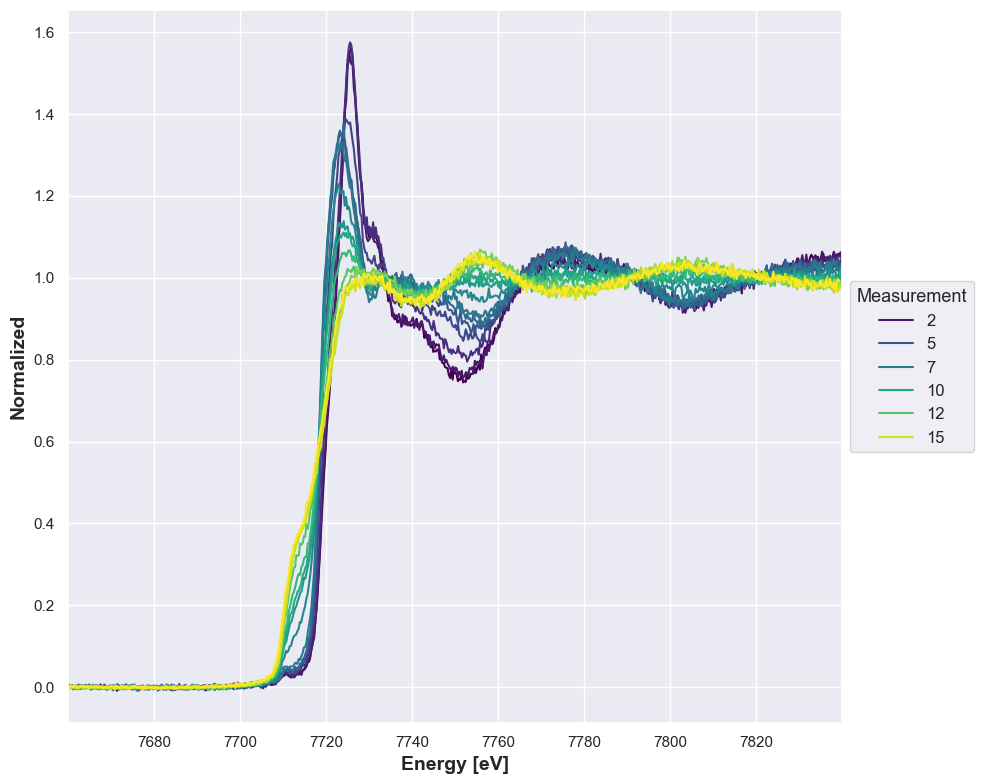

In [14]:
plot_data(
    df_data, 
    metal='Co', 
    interactive=interactive, 
    save_name='Averaged_normalized_allMeasurements.png', 
    save_plot=False,
)

## PCA/NMF test

In [15]:
from sklearn.decomposition import PCA, NMF, FastICA

In [16]:
metal = 'Co'
n_measurements = len(df_data['Measurement'][df_data['Metal'] == metal].unique())
n_points = len(df_data['Normalized'][(df_data['Metal'] == metal) & (df_data['Measurement'] == 1)].to_numpy())
test_array = df_data['Normalized'][df_data['Metal'] == metal].to_numpy().reshape(n_measurements, -1)
test_array = test_array - test_array.min()

In [17]:
pca = PCA()
pca.fit(test_array)

PCA()

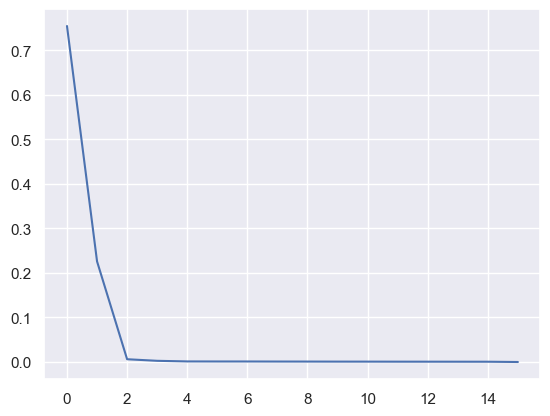

In [18]:
plt.plot(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.show()

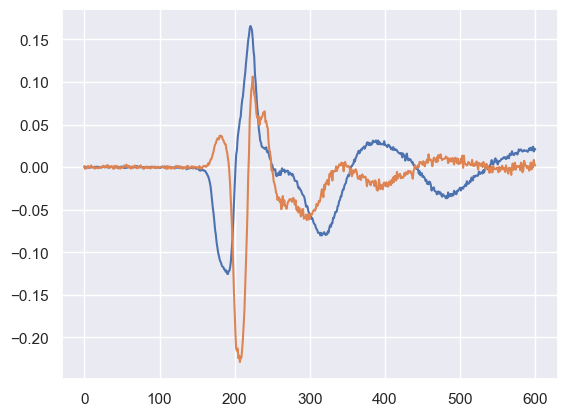

In [19]:
plt.plot(np.arange(n_points), pca.components_[0])
plt.plot(np.arange(n_points), pca.components_[1])
# plt.plot(np.arange(n_points), pca.components_[2])
# plt.plot(np.arange(n_points), pca.components_[3])
plt.show()

In [20]:
n_components = 2
nmf = NMF(n_components=n_components, random_state=42)
nmf.fit(test_array)

NMF(n_components=2, random_state=42)

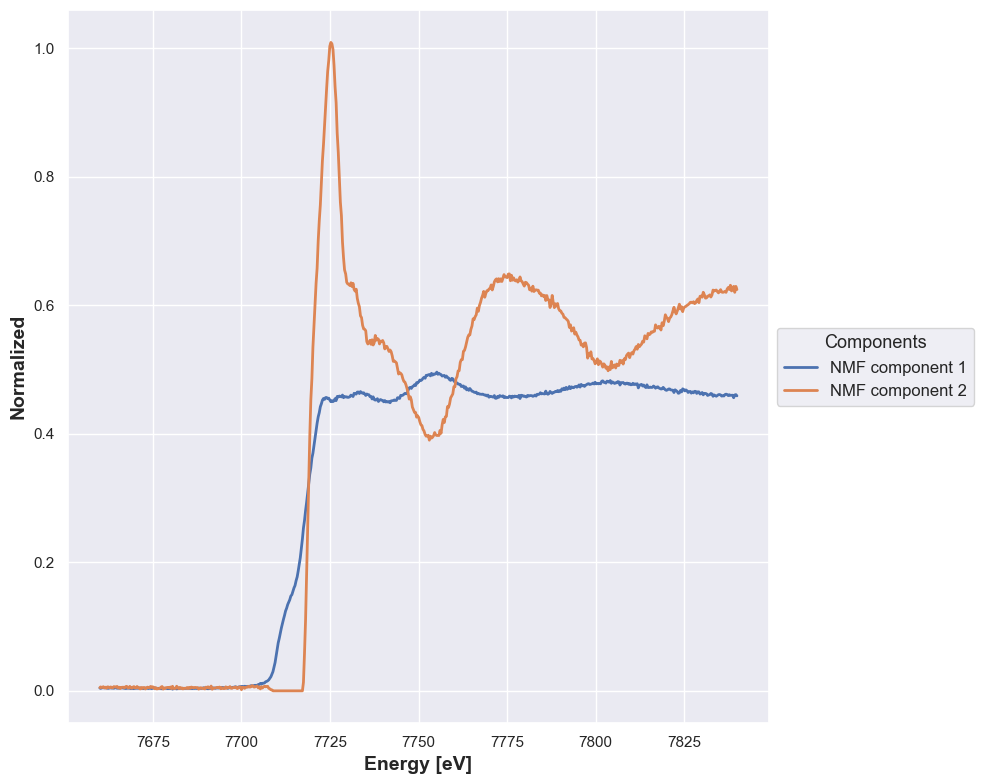

In [21]:
plt.figure(figsize=(10,8))
for i, color in zip(range(nmf.components_.shape[0]), sns.color_palette()): # ['b', 'DarkOrange']
    plt.plot(df_data['Energy_Corrected'][(df_data['Metal'] == metal) & (df_data['Measurement'] == 1)], nmf.components_[i], label=f'NMF component {i+1}', lw=2, c=color)

# Specify text and formatting of axis labels
plt.xlabel(
    'Energy [eV]', 
    fontsize=14, 
    fontweight='bold'
    )
plt.ylabel(
    'Normalized', 
    fontsize=14, 
    fontweight='bold'
    )

plt.legend(
    loc='center left', 
    bbox_to_anchor=(1,0.5), 
    title='Components',
    fontsize=12,
    title_fontsize=13,
    )

plt.tight_layout()
# plt.savefig('../Data/Plots/NMF_components_plot.png', dpi=300)
plt.show()

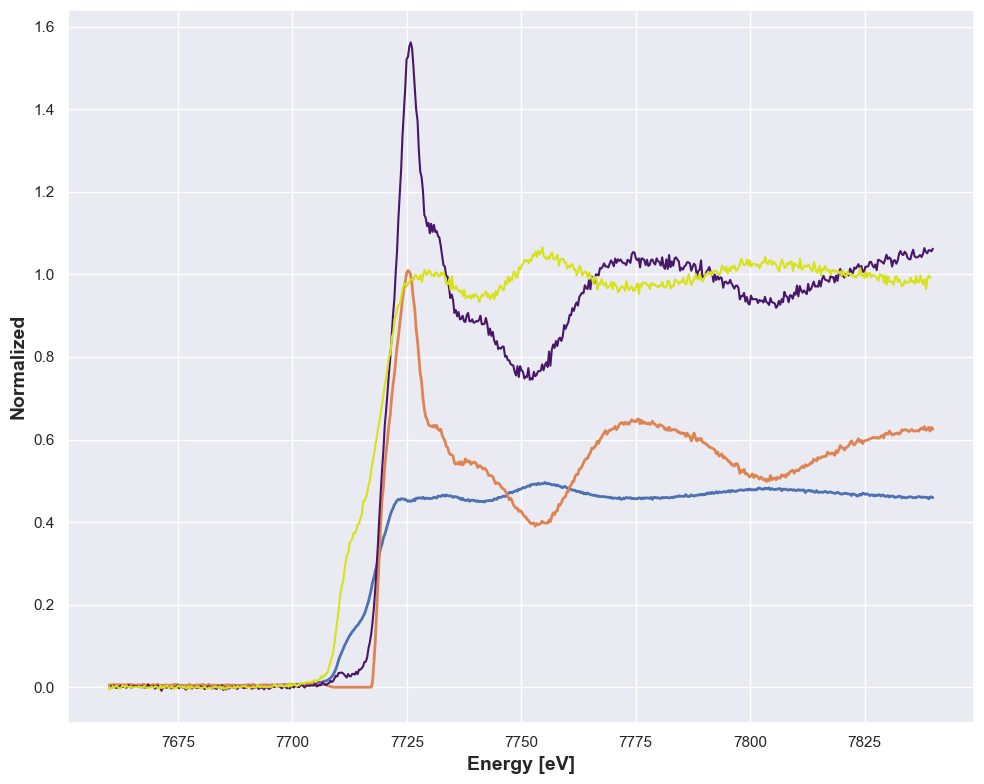

In [22]:
fig, ax = plt.subplots(ncols=1,figsize=(10,8))
for i, color in zip(range(nmf.components_.shape[0]), sns.color_palette()):
    ax.plot(df_data['Energy_Corrected'][(df_data['Metal'] == metal) & (df_data['Measurement'] == 1)], nmf.components_[i], label=f'NMF component {i+1}', lw=2, c=color)

# ax2  = ax.twinx()
ax.plot(df_data['Energy_Corrected'][(df_data['Metal'] == metal) & (df_data['Measurement'] == 1)], df_data['Normalized'][(df_data['Metal'] == metal) & (df_data['Measurement'] == 1)], c=sns.color_palette('viridis', n_colors=16)[0])
ax.plot(df_data['Energy_Corrected'][(df_data['Metal'] == metal) & (df_data['Measurement'] == 16)], df_data['Normalized'][(df_data['Metal'] == metal) & (df_data['Measurement'] == 16)], c=sns.color_palette('viridis', n_colors=16)[-1])
# Specify text and formatting of axis labels
ax.set_xlabel(
    'Energy [eV]', 
    fontsize=14, 
    fontweight='bold'
    )
ax.set_ylabel(
    'Normalized', 
    fontsize=14, 
    fontweight='bold'
    )

# plt.legend(
#     loc='center left', 
#     bbox_to_anchor=(1,0.5), 
#     title='Components',
#     fontsize=12,
#     title_fontsize=13,
#     )

plt.tight_layout()
# plt.savefig('../Data/Plots/NMF_components_comparison_plot.png', dpi=300)
plt.show()

In [23]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [24]:
test_nmf = nmf.transform(test_array)
test_nmf

array([[0.62800316, 1.20184971],
       [0.64990428, 1.18548925],
       [0.70071742, 1.17459813],
       [0.90699548, 1.01662625],
       [1.06207873, 0.89581302],
       [1.10701211, 0.8641167 ],
       [1.20579568, 0.78497397],
       [1.49674577, 0.5443769 ],
       [1.72174961, 0.358268  ],
       [1.78794669, 0.30363917],
       [1.91554698, 0.19630145],
       [2.08678075, 0.05399476],
       [2.15446685, 0.        ],
       [2.1395979 , 0.        ],
       [2.13878789, 0.        ],
       [2.14266709, 0.        ]])

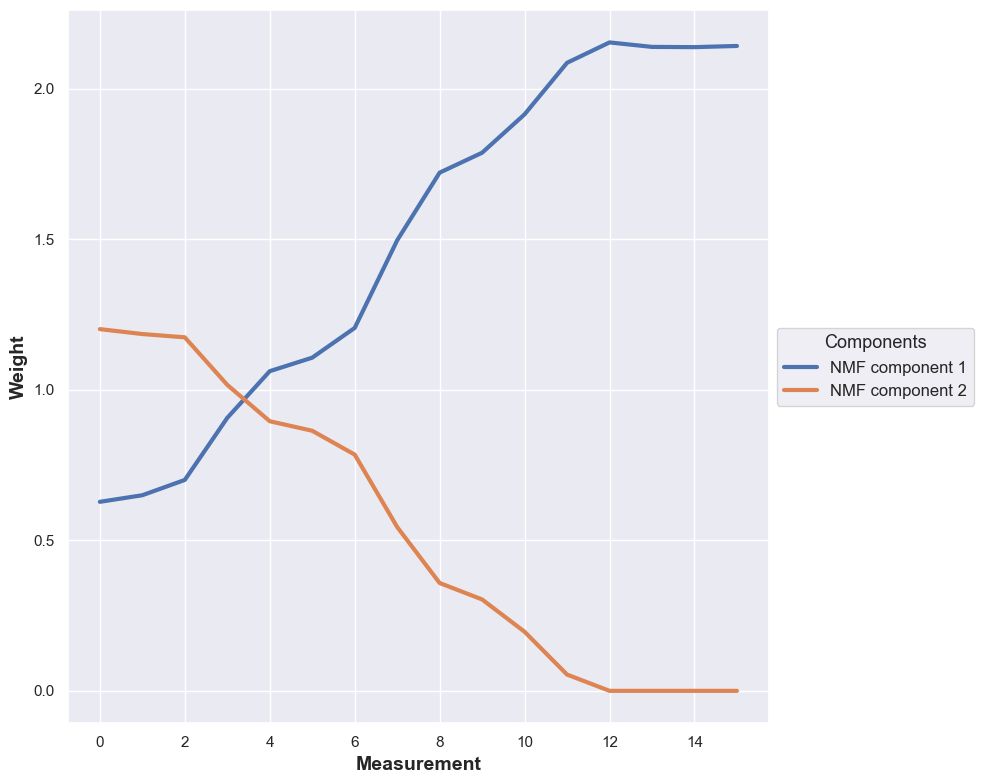

In [25]:
plt.figure(figsize=(10,8))
for i in range(test_nmf.shape[1]):
    plt.plot(np.arange(n_measurements), test_nmf[:,i], label=f'NMF component {i+1}', lw=3)

# Specify text and formatting of axis labels
plt.xlabel(
    'Measurement', 
    fontsize=14, 
    fontweight='bold'
    )
plt.ylabel(
    'Weight', 
    fontsize=14, 
    fontweight='bold'
    )

plt.legend(
    loc='center left', 
    bbox_to_anchor=(1,0.5), 
    title='Components',
    fontsize=12,
    title_fontsize=13,
    )

plt.tight_layout()
# plt.savefig('../Data/Plots/NMF_plot.png', dpi=300)
plt.show()

In [26]:
# for j in range(n_measurements):
#     plt.plot(np.arange(n_points), np.sum([nmf.components_[i]*test_nmf[j,i] for i in range(n_components)], axis=0), label='LC')
#     plt.plot(np.arange(n_points), test_array[j], label='Data')
#     plt.legend()
#     plt.show()

## Linear combination analysis
This section performs linear combination analysis (LCA) of every combination of two-component systems consisting of 1 metal foil and 1 precursor (with the same metal). 

The estimated uncertainties of the dependent parameter behaves weird when the independent parameter is approximately zero. In the column "StdCorrected" this is handled by using the same uncertainty for both parameters.

### LCA w. reference spectra

In [27]:
# df_results = linear_combination_analysis(
#     data = df_data, 
#     products = df_foils, 
#     precursors = df_precursors,
# )
# df_results.head()

### LCA w. internal components

In [28]:
df_results = LCA_internal(
    df_data, 
    initial_state_index = 1, 
    # intermediate_state_index = None, 
    # fit_min=7700,
    # fit_max=7710,
    final_state_index = -1,
)
df_results.head()

LCA progress: : 64it [00:00, 113.78it/s, Analysing frame 1 + 16]           


,Experiment,Metal,Product,Intermediate,Precursor,Precursor Type,Measurement,Temperature,Temperature Average,Temperature Std,Parameter,Value,StdErr,StdCorrected,Energy Range,Basis Function
0,Frame 1 + last,Co,last,None,1,Internal,1,0.0,0,0,product_weight,2.331468e-15,5.361460e-17,5.361460e-17,"[7660.01708984375, 7660.22705078125, 7660.4726...","[-0.0034689395105624147, -0.002025918730810221..."
1,Frame 1 + last,Co,last,None,1,Internal,1,0.0,0,0,precursor_weight,1.000000e+00,0.000000e+00,5.361460e-17,"[7660.01708984375, 7660.22705078125, 7660.4726...","[0.00011390603946846732, 0.001439970100124485,..."
2,Frame 1 + last,Co,last,None,1,Internal,2,0.0,0,0,product_weight,2.256247e-02,3.223006e-03,3.223006e-03,"[7660.04541015625, 7660.26123046875, 7660.5053...","[-0.0020879767840010404, -0.002032230287570082..."
3,Frame 1 + last,Co,last,None,1,Internal,2,0.0,0,0,precursor_weight,9.774375e-01,3.223007e-03,3.223007e-03,"[7660.04541015625, 7660.26123046875, 7660.5053...","[0.00029277049416160457, 0.001499673358537501,..."
4,Frame 1 + last,Co,last,None,1,Internal,3,0.0,0,0,product_weight,6.916702e-02,7.877292e-03,7.877292e-03,"[7660.0419921875, 7660.2724609375, 7660.520507...","[-0.002254644699275689, -0.0020473903683282213..."


#### Saving results as .csv file

In [29]:
# save_data(df_results, filename='LCA_results.csv')

### Results plotting

#### Temperature curves

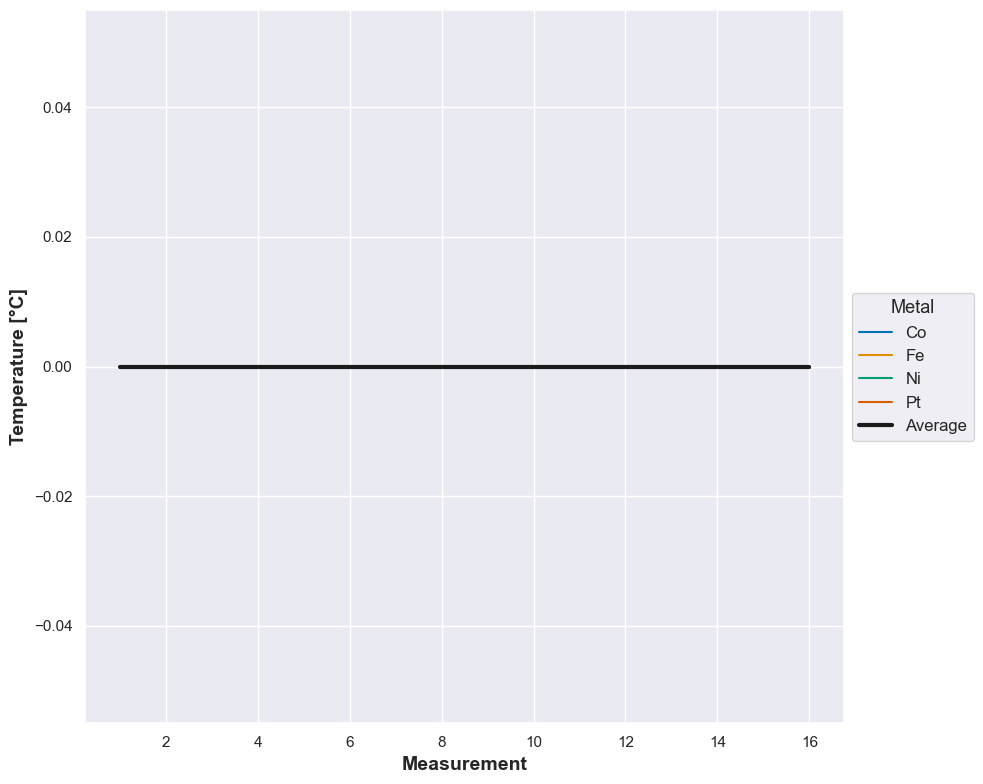

In [30]:
plot_temperatures(
    df_results, 
    with_uncertainty=True, 
    interactive=interactive
)

#### Waterfall plots


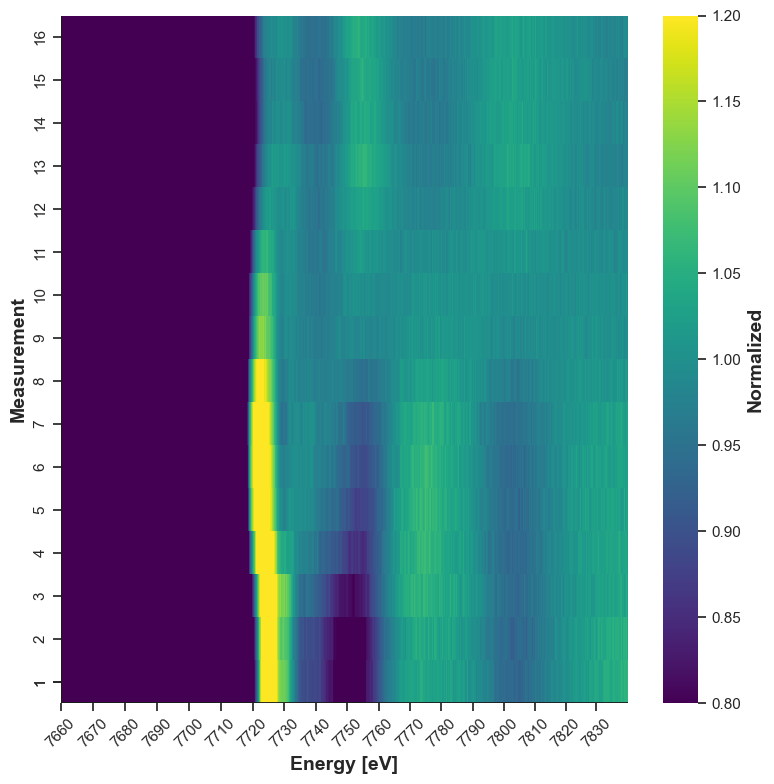

In [36]:
plot_insitu_waterfall(
    df_data, 
    experiment='PtFeCoNi_60pct_insitu_Co_xanes', 
    # lines=[5,33,109],
    vmin=0.8, 
    vmax=1.2, 
    y_axis='Measurement',
    time_unit='m',
    interactive=interactive,
    homogenize_measurements=True,
    save_plot=False,
)

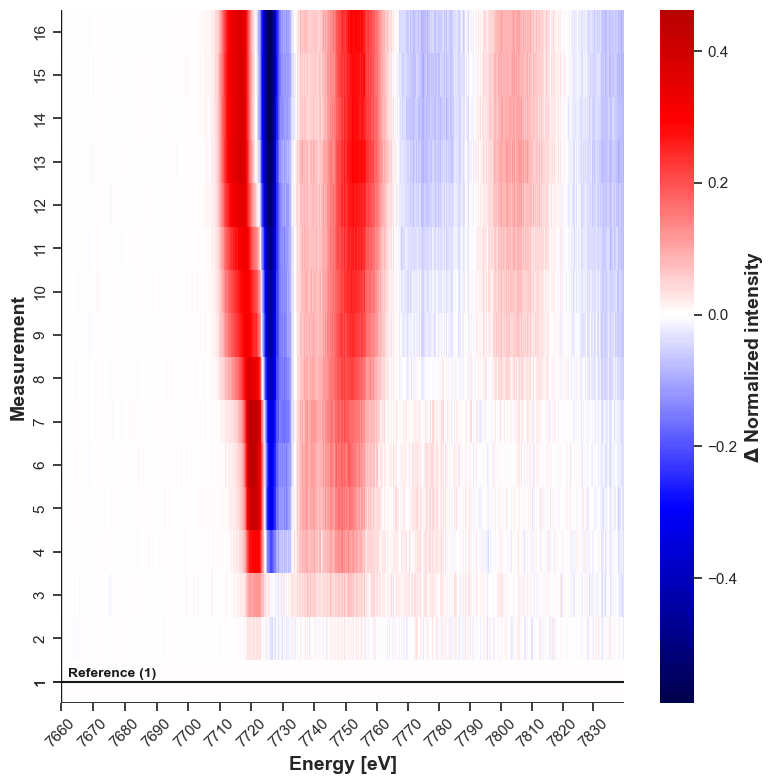

In [38]:
plot_insitu_change(
    df_data, 
    experiment='PtFeCoNi_60pct_insitu_Co_xanes', 
    reference_measurement=1,
    # lines=[5,348],
    # vmin=-0.25, 
    # vmax=0.25, 
    y_axis='Measurement',
    time_unit='m',
    interactive=interactive,
    homogenize_measurements=True,
    save_plot=False,
)

#### Plot of a single LCA fit
Plot showing the measurement that is being fitted, the contributions from the components and the residual.

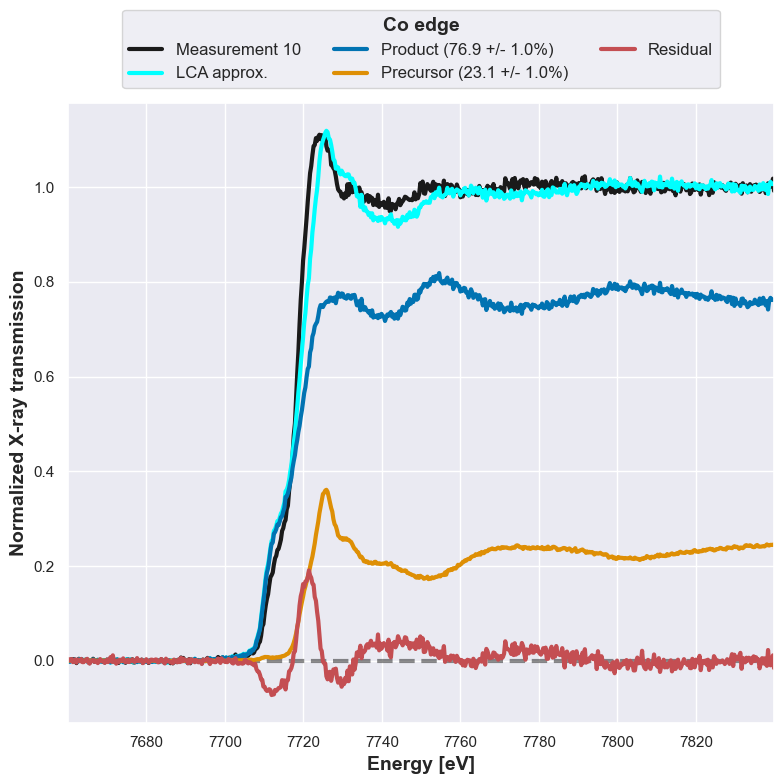

In [33]:
plot_LCA(
    df_results, 
    df_data, 
    experiment='Frame 1 + last', 
    metal='Co',
    measurement=10, 
    interactive=interactive
)

#### Plot of LCA component weights over time
Plot showing how the weight of each component changes over time.

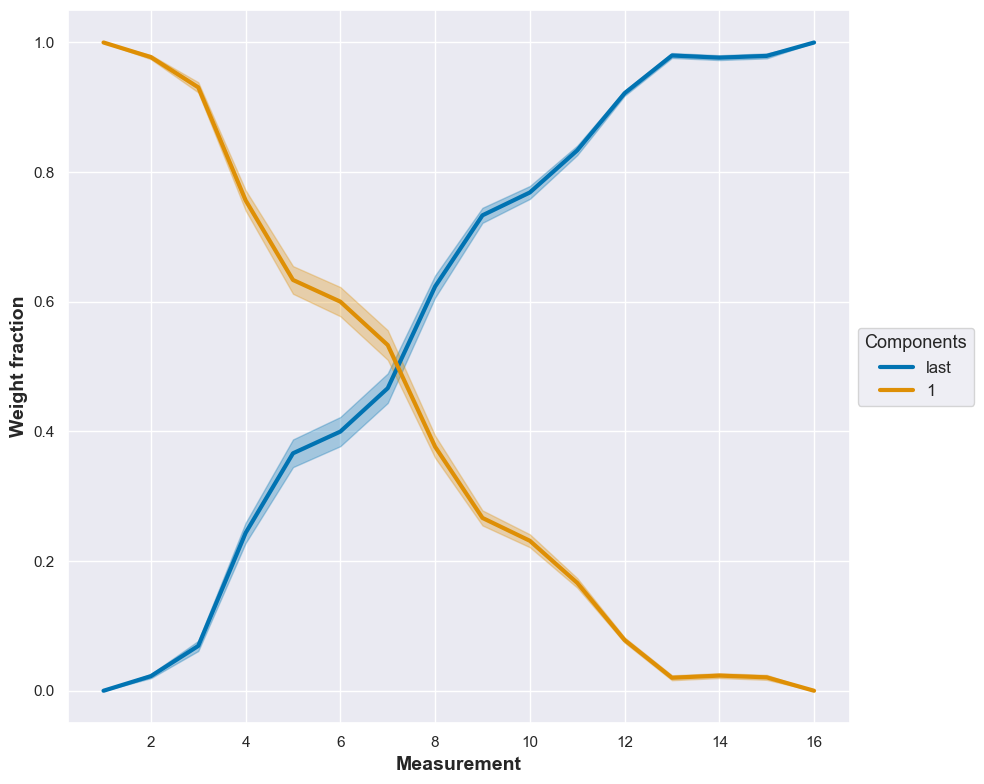

In [34]:
plot_LCA_change(
    df_results, 
    product='last', 
    precursor=1, 
    metal='Co', 
    x_axis='Measurement', 
    with_uncertainty=True, 
    interactive=interactive, 
    save_plot=False,
)

#### Comparison of reduction times of different metals
Plot showing the weight of the metal foil component over time for the different metal species in the sample. 

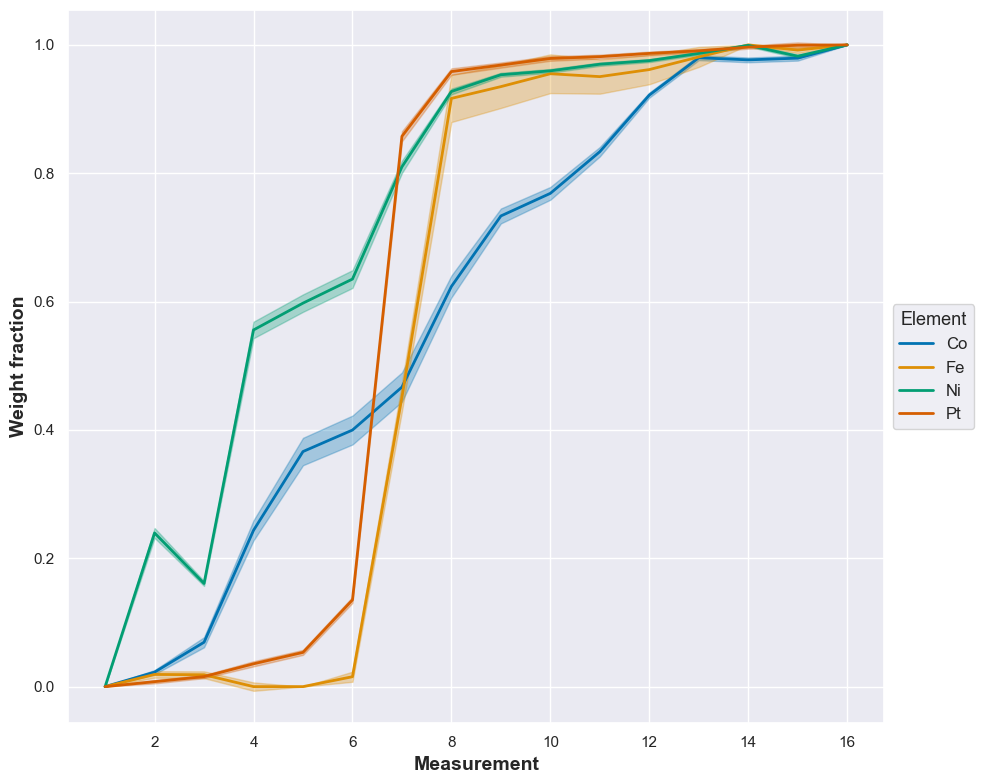

In [35]:
plot_reduction_comparison(
    df_results, 
    precursor_type='all', 
    x_axis='Measurement', 
    with_uncertainty=True, 
    interactive=interactive,
    save_plot=False,
)